<h1 style="text-align: center; font-family: 'Jetbrains Mono'; color: purple;"><b>Exercise set 1</b></h1>




<h3 style="text-align: center; font-family: 'Jetbrains Mono'; color: black;"><i>Datavisualization</i></h3>


<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i>1 The Dataset: Immigration from 1980 to 2013:</i></h3>


<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>Import modules and dataset:</i></h4>


In [6]:
import pandas as pd #panel data library
import numpy as numpy #linear algebra, especially array 
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
plt.style.use("ggplot")

<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>Read_Excel:</i></h5>


In [9]:
df_can=pd.read_excel("https://bit.ly/32HXvZB",
sheet_name="Canada by Citizenship", skiprows=range(20),
skipfooter=2)

In [10]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)


In [12]:
df_can.columns = list(map(str, df_can.columns))
df_can['Total'] = df_can.sum(axis=1, numeric_only=True)

In [35]:
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>Question 1:</i></h5>


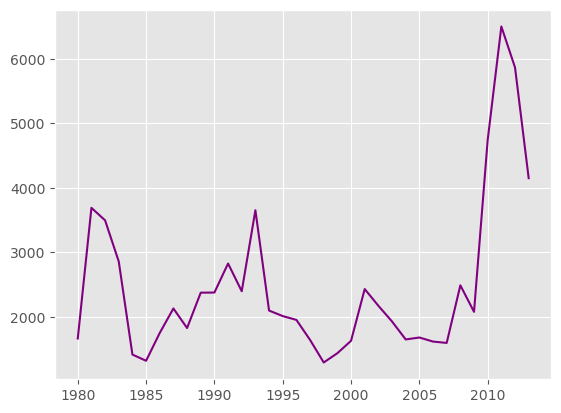

In [38]:
years = list(map(str, range(1980, 2014)))
haiti = df_can.loc[df_can["OdName"]=="Haiti", years]; haiti
 
haiti = haiti.T
haiti.index = haiti.index.map(int)

haiti.plot(kind='line', color = "purple", legend = False)
plt.show;

<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>Question 2:</i></h5>


<function matplotlib.pyplot.show(close=None, block=None)>

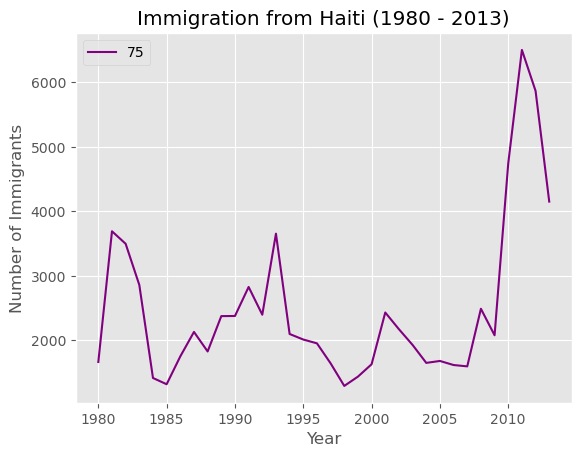

In [40]:
haiti = df_can.loc[df_can["OdName"]=="Haiti", years]; haiti
years = list(map(str, range(1980, 2014))) 
haiti = haiti.T
haiti.index = haiti.index.map(int)

haiti.plot(kind='line', color = "purple")

plt.title('Immigration from Haiti (1980 - 2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show

<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>Question 3:</i></h5>


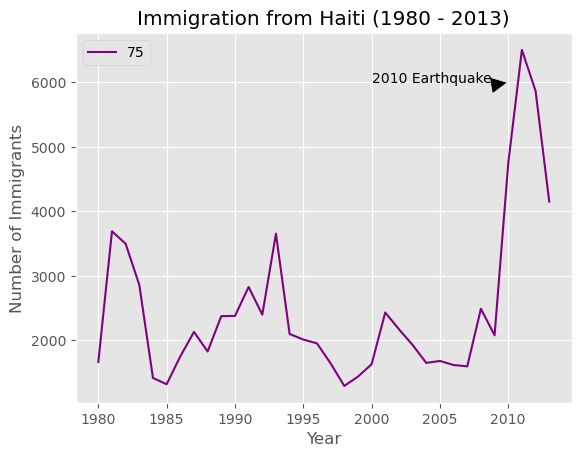

In [42]:
haiti = df_can.loc[df_can["OdName"]=="Haiti", years]; haiti
years = list(map(str, range(1980, 2014))) 
haiti = haiti.T
haiti.index = haiti.index.map(int)

haiti.plot(kind='line', color = "purple")

plt.title('Immigration from Haiti (1980 - 2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.annotate("2010 Earthquake",
            xy = (2010,6000),
            xytext=(2000,6000),
               arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.grid(True)
plt.show()

<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>Question 4:</i></h5>


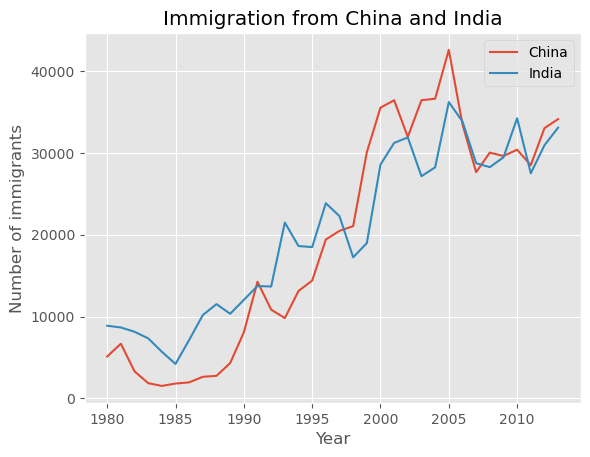

In [44]:
df_can.set_index('OdName', inplace=True)
df_CI = df_can.loc[['China','India'],years]
df_CI = df_CI.transpose()

df_CI.plot(kind = "line", xlabel = "Year", ylabel = "Number of immigrants")
plt.title("Immigration from China and India")
plt.legend()

In [ ]:
df_can.head()

<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red ;"><i>2: Rename some of the columns so that they make sense:</i></h3>


In [48]:
df_can.rename(columns = {'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace = True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [50]:
# Reset the index to bring 'OdName' back as a column
df_can.reset_index(inplace=True)

# Rename 'OdName' to 'Country'
df_can.rename(columns={'OdName': 'Country'}, inplace=True)

# Set 'Country' as the index again
df_can.set_index('Country', inplace=True)

df_can.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


### Create a line plot that visualized the top 5 countries that contribued the most 
immigrants to Canada from 198  to 2013.

In [52]:
df_can.sort_values(["Total"], ascending=False, axis=0, inplace=True)
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>* Question 1: Produce the area plots (set stacked = False) </i></h4>


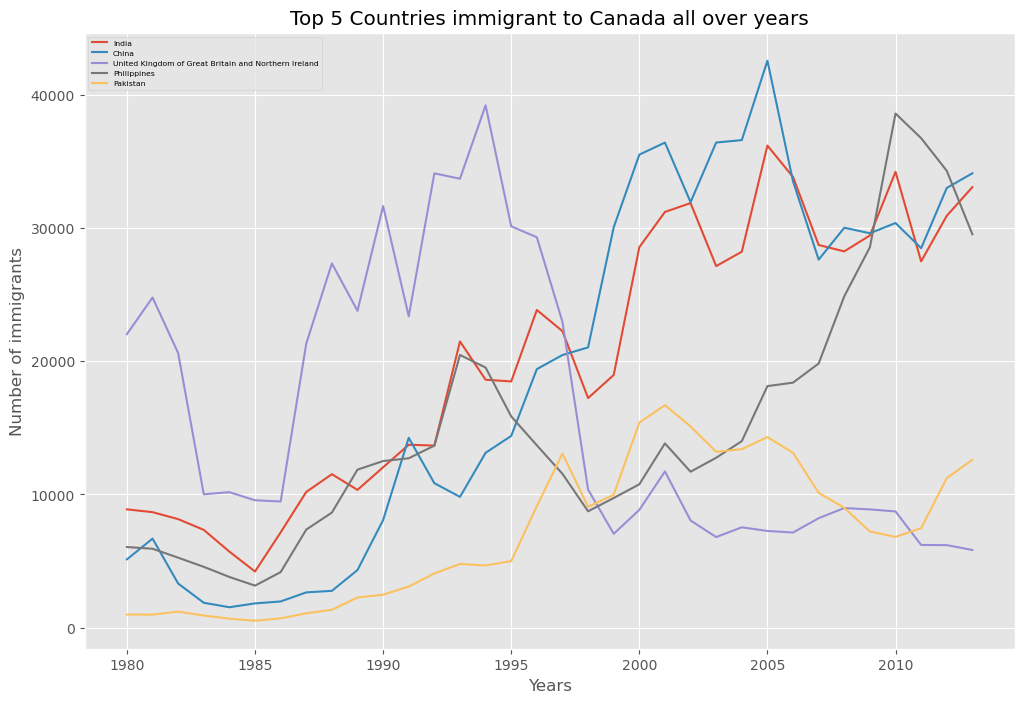

In [68]:
df_top5.plot(kind = "line", figsize = (12,8), stacked = False)

plt.legend(loc = "upper left", prop ={"size":5.5})
plt.title("Top 5 Countries immigrant to Canada all over years")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")
plt.show;

<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>* Question 2: Produce the 5 bottom countries area plots (set stacked = True) </i></h4>


In [56]:
df_can.sort_values(["Total"], ascending=False, axis=0, inplace=True)
df_bot5 = df_can.tail()
df_bot5 = df_bot5[years].transpose()
df_bot5.tail()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
2009,0,0,0,0,0
2010,1,0,0,0,0
2011,0,0,0,0,0
2012,0,0,0,0,0
2013,0,2,0,0,0


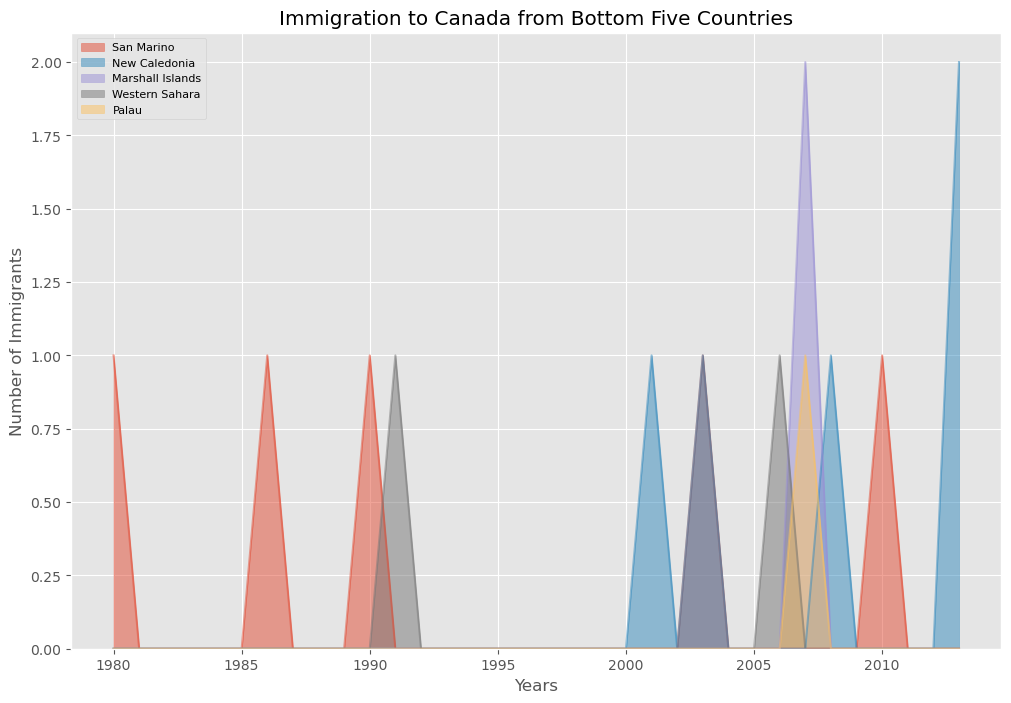

In [58]:
df_bot5.plot(kind='area', stacked=False, figsize=(12, 8))

plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.legend(loc='upper left', prop={'size': 8})
plt.title('Immigration to Canada from Bottom Five Countries')
plt.show()

<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i>* 3) Recall </i></h3>


<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>* Question 1: Histogram for Canada in 2013 </i></h4>


In [62]:
import numpy as np
count, bin_edges = np.histogram(df_can["2013"])
print(count)

[178  11   1   2   0   0   0   0   1   2]


In [ ]:
print(bin_edges)

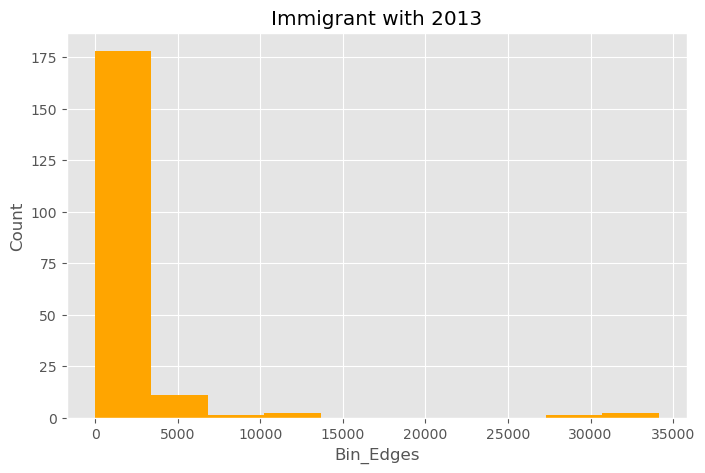

In [66]:
df_13 = df_can["2013"]
df_13.plot(kind='hist', figsize=(8, 5), color = "orange")
plt.xlabel("Bin_Edges")
plt.ylabel("Count")
plt.title("Immigrant with 2013")
plt.show();

<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>* Question 2: Bin_edge to produce histogram fo Canada in 2013 </i></h4>


In [ ]:
df_13 = df_can["2013"]
df_13.plot(kind='hist', bins = 50, figsize=(8, 5),xticks = bin_edges , color = "orange")
plt.xlabel("Number of Immigrant")
plt.ylabel("Number of Country")
plt.show();

<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i>* 4: Immigration Distribution for Denmark, Norway and Sweden </i></h3>


In [72]:
df_t = df_can.loc[["Denmark", "Norway", "Sweden"], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


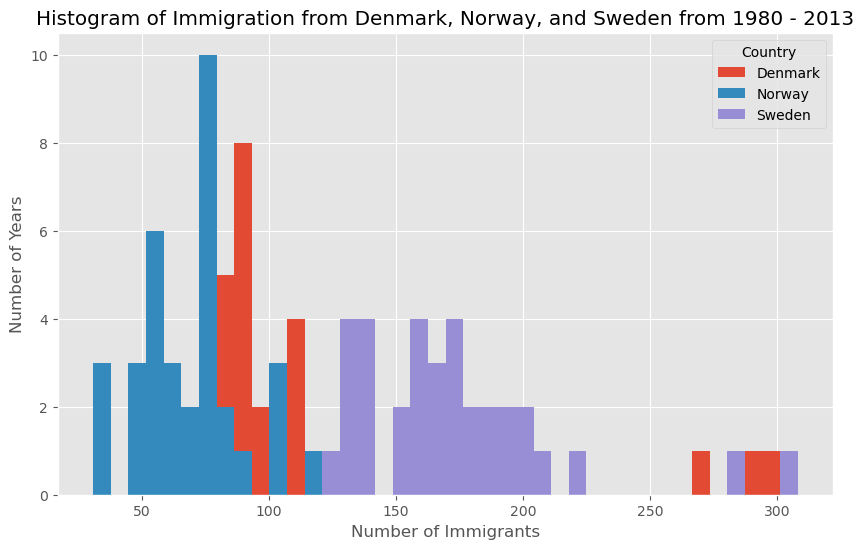

In [82]:
# generate histogram
df_t.plot(kind="hist", bins = 40, figsize=(10, 6))
plt.title("Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")
plt.show()

* Increase the bins size to 15 by passing in bins parameter

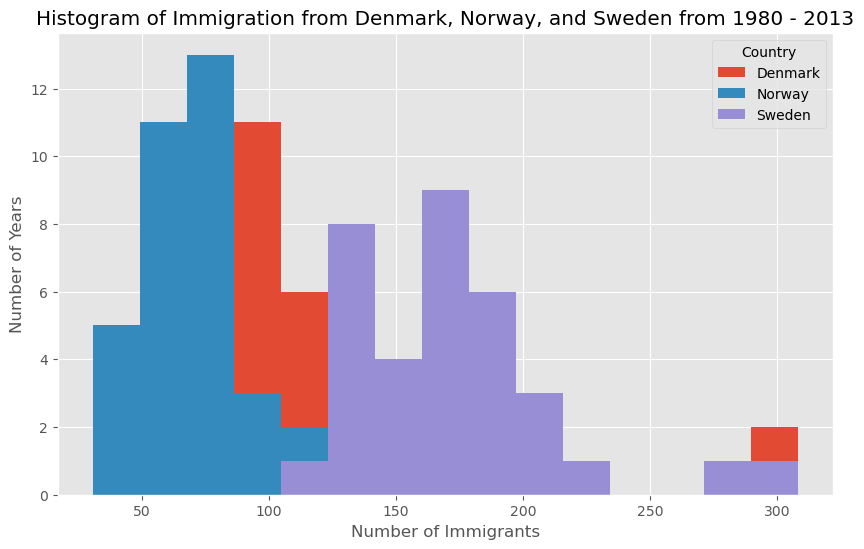

In [76]:
df_t.plot(kind="hist", bins=15, figsize=(10, 6))
plt.title("Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")
plt.show()


* set transparency to 60% by passing in alpha paramemter label the x-axis by
passing in x-label paramater

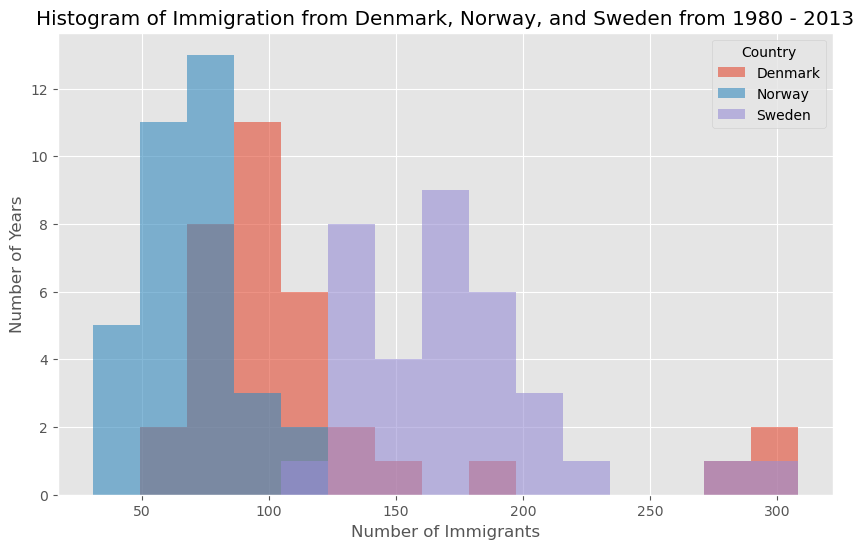

In [90]:
df_t.plot(kind="hist", bins=15, alpha = 0.6, figsize=(10, 6))
plt.title("Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")
plt.show()


* change the colors of the plots by passing in color parameter

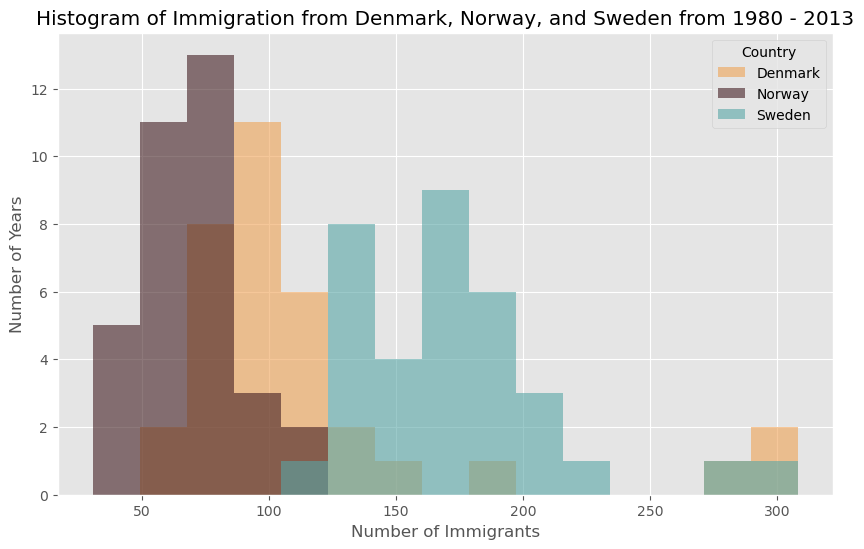

In [95]:
df_t.plot(kind="hist", bins=15, alpha = 0.6, figsize=(10, 6), color = ["#efa355","#421e22","#58a6a6"])
plt.title("Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")
plt.show()


Text(0.5, 0, 'Number of Immigrants')

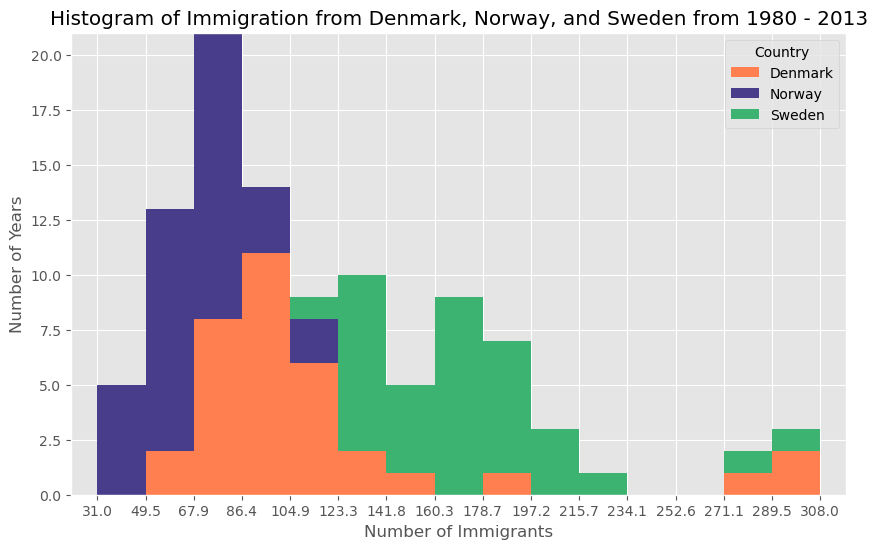

In [97]:
count, bin_edges = np.histogram(df_t, bins=15)

# Set x-axis limits
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

# Stacked Histogram
df_t.plot(kind='hist', figsize=(10, 6), bins=15, xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'], stacked=True, xlim=(xmin, xmax))

# Plot titles and labels
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

# Show the plot


<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>* Question: Display the immigration distribution for Greece, Albania, and Bulgaria
for years 1980 - 2013 ? Use an overlapping plot with 15 bins and a transparency
value of 0.35. </i></h4>


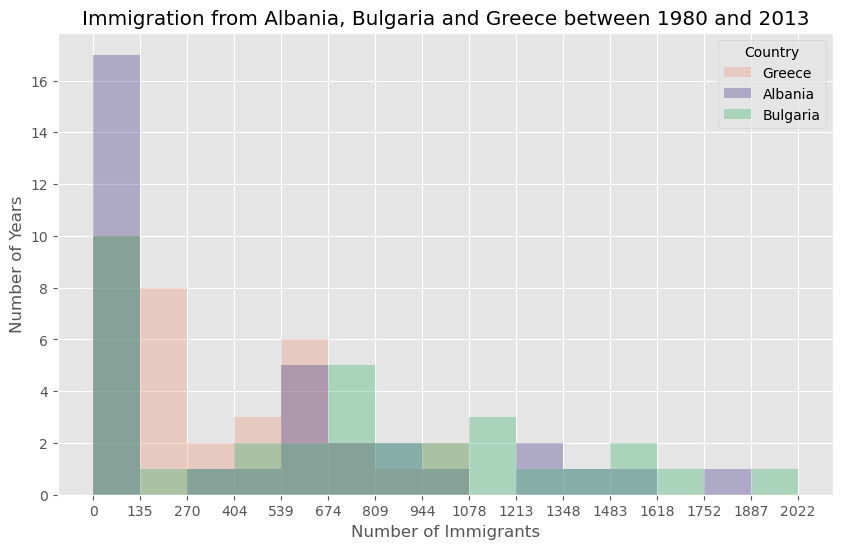

In [109]:
df_3 = df_can.loc[['Greece','Albania','Bulgaria'],years].transpose()

xmin = bin_edges[0]-10 
xmax = bin_edges[-1]+ 10 


count, bin_edges = np.histogram(df_3, 15)
df_3.plot(kind = 'hist', 
           figsize = (10,6), 
           bins = 15, 
           alpha = 0.35, 
           xticks = bin_edges, 
           color = ['darksalmon','darkslateblue','mediumseagreen']
          )
plt.title('Immigration from Albania, Bulgaria and Greece between 1980 and 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

plt.show();

<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i>Charts: Let’s compare the number of Icelandic immigrants (country = ’Iceland’) to Canada
from year 1980 to 2013n </i></h3>


In [117]:
df_iceland = df_can.loc["Iceland", years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

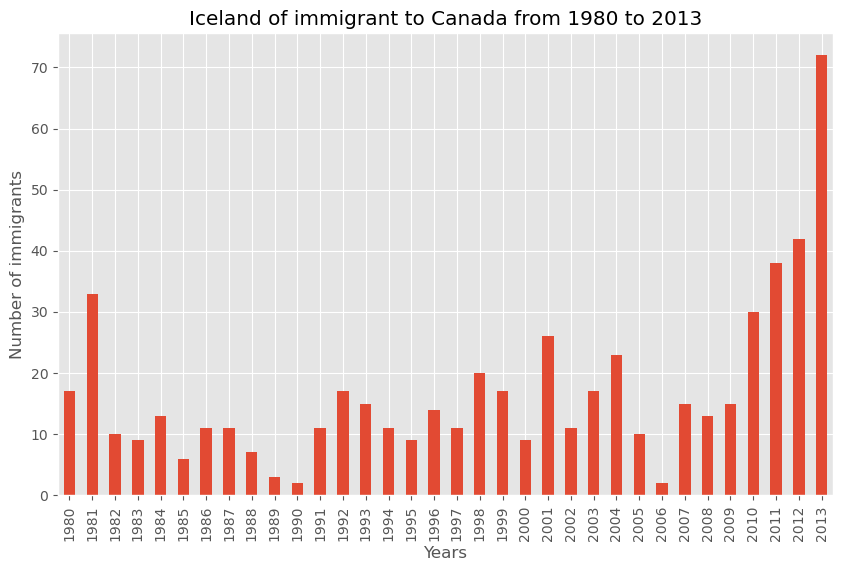

In [123]:
df_iceland.plot(kind="bar",figsize =(10,6))
plt.xlabel("Years")
plt.ylabel("Number of immigrants")
plt.title("Iceland of immigrant to Canada from 1980 to 2013")
plt.show;

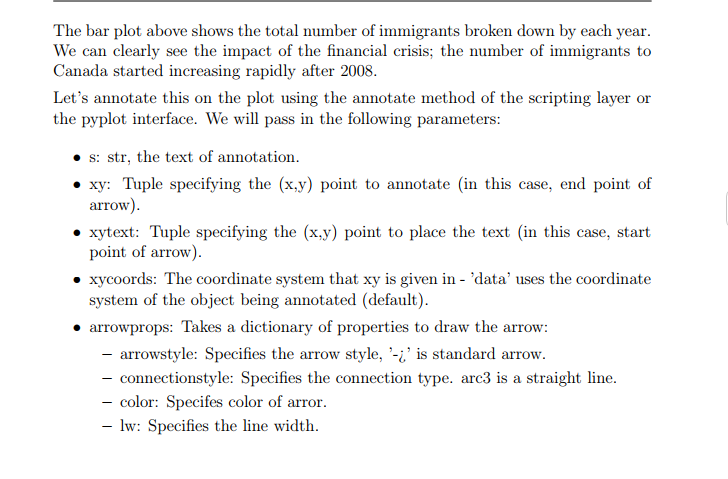

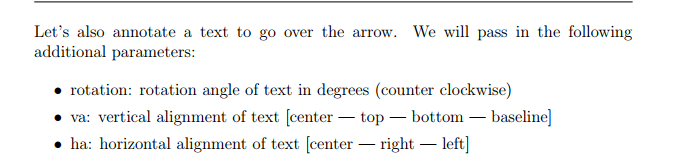

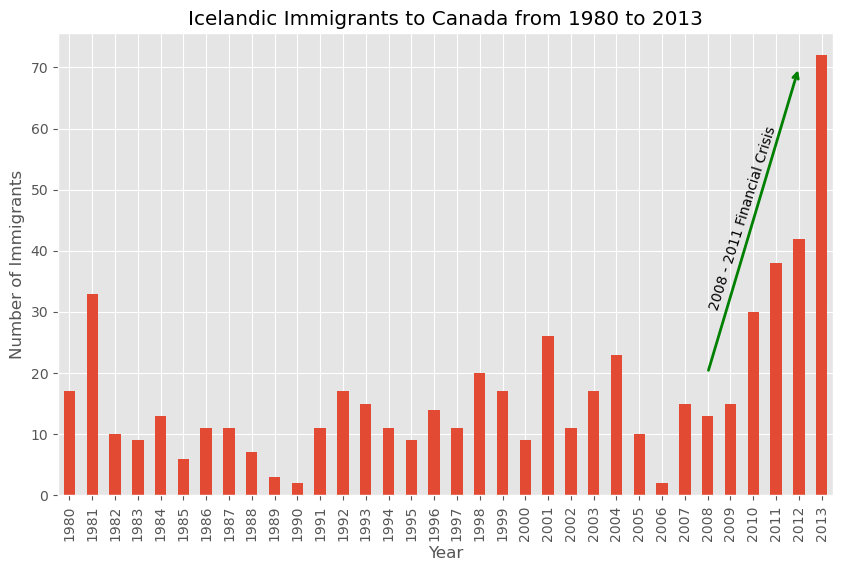

In [136]:
#Solution: 
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')


plt.annotate('',
             xy=(32, 70),
             xytext=(28, 20),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green', lw=2)
             )

plt.annotate('2008 - 2011 Financial Crisis',
             xy=(28, 30),  
             rotation=72.5, 
             va='bottom', 
             ha='left',  
             color ="black"
             )

plt.show()

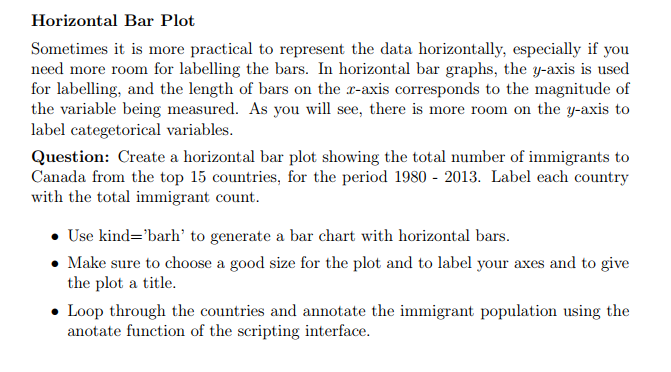

<function matplotlib.pyplot.show(close=None, block=None)>

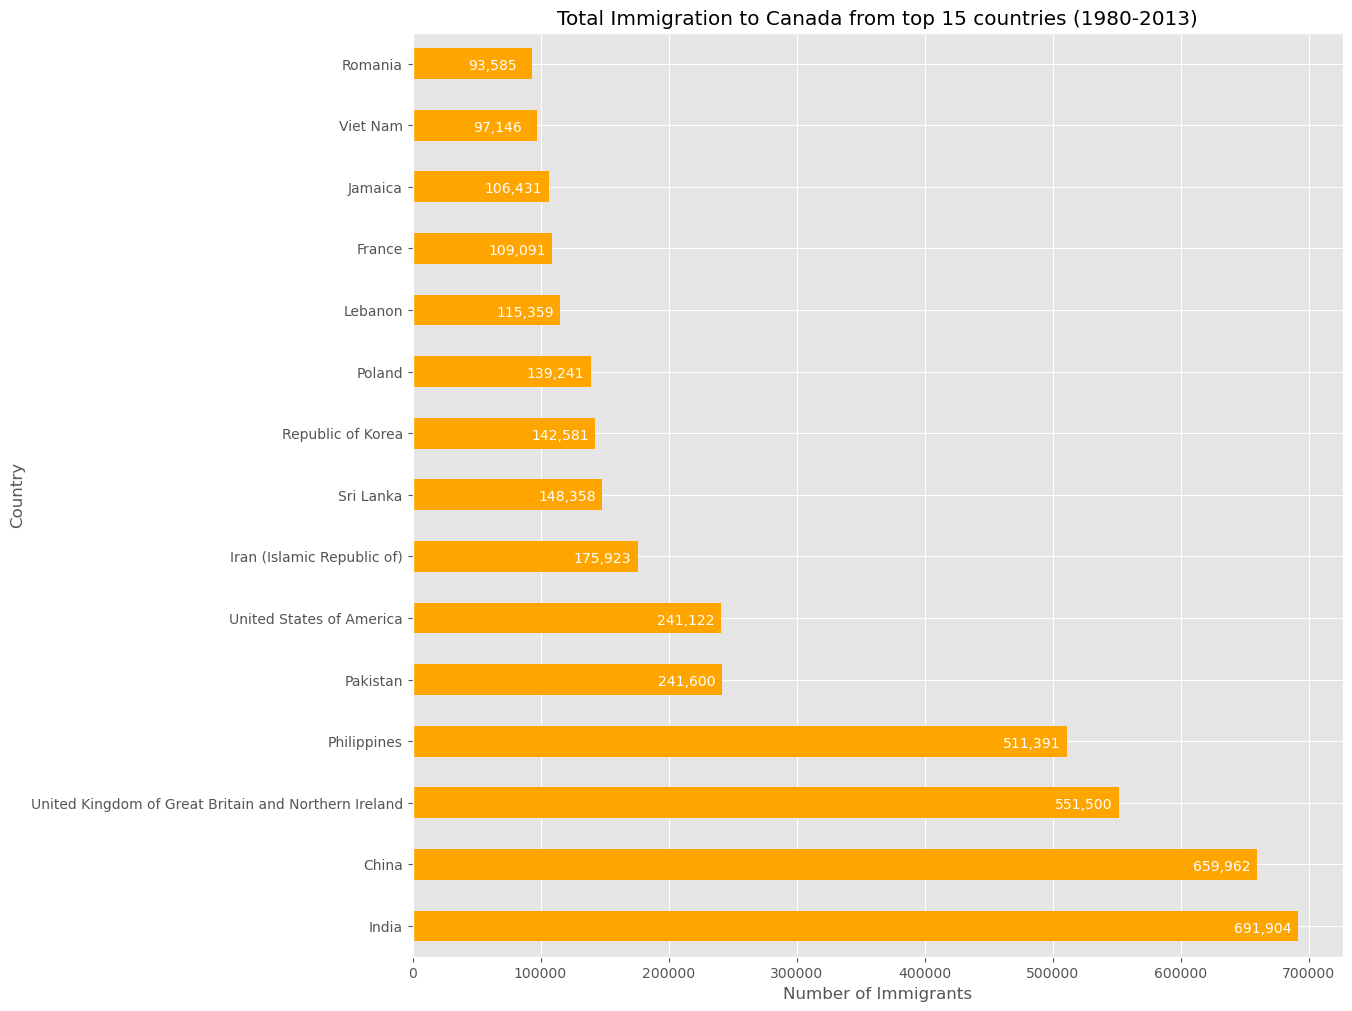

In [166]:
df_top_15 = df_can.sort_values('Total',axis = 0, ascending = False).head(15)['Total'].transpose()
df_top_15.plot(kind = 'barh',figsize=(12, 12), color = "orange")
plt.title('Total Immigration to Canada from top 15 countries (1980-2013)')
plt.xlabel('Number of Immigrants')
plt.ylabel('Country')

for index, value in enumerate(df_top_15): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 50000, index - 0.10), color='white')
    
plt.show
